In [1]:
from timm.data.dataset import ImageDataset
 
dataset = ImageDataset('./imagenette2-320')
dataset[0]
#(<PIL.Image.Image image mode=RGB size=426x320 at 0x22E890BF5C8>, 0)

(<PIL.Image.Image image mode=RGB size=426x320>, 0)

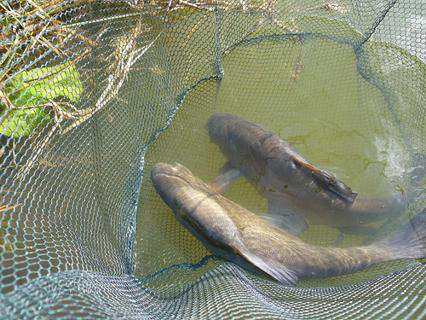

In [6]:
dataset[0][0]

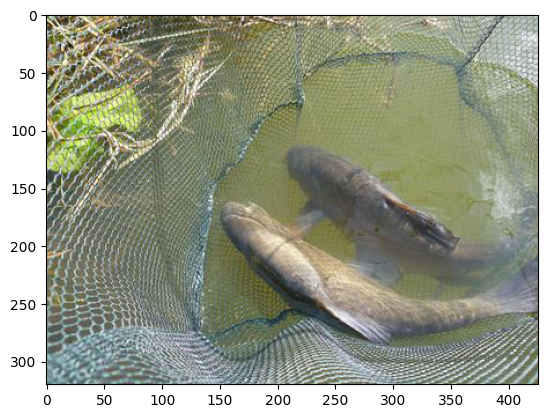

In [7]:
import matplotlib.pyplot as plt # plt 用于显示图片
plt.imshow(dataset[0][0])

In [3]:
dataset.parser
#<timm.data.parsers.parser_image_folder.ParserImageFolder at 0x22e83cd0688>

In [14]:
img, taget = dataset.parser[0]

In [15]:
import matplotlib.image as mpimg # mpimg 用于读取图片
img = mpimg.imread(img)
img.shape

(320, 426, 3)

In [18]:
dataset.parser.samples[:5]

[('./imagenette2-320\\train\\n01440764\\ILSVRC2012_val_00000293.JPEG', 0),
 ('./imagenette2-320\\train\\n01440764\\ILSVRC2012_val_00002138.JPEG', 0),
 ('./imagenette2-320\\train\\n01440764\\ILSVRC2012_val_00003014.JPEG', 0),
 ('./imagenette2-320\\train\\n01440764\\ILSVRC2012_val_00006697.JPEG', 0),
 ('./imagenette2-320\\train\\n01440764\\ILSVRC2012_val_00007197.JPEG', 0)]

In [20]:
dataset.parser.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

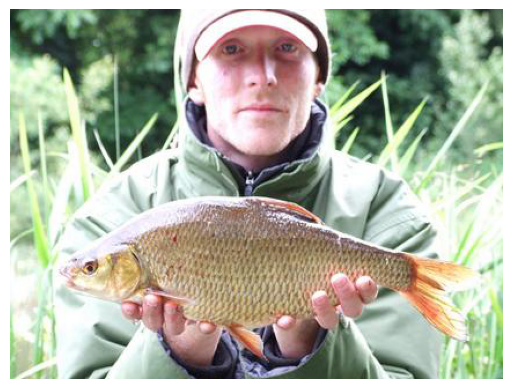

In [22]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
 
lena = mpimg.imread(dataset.parser.samples[7][0]) # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)
 
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [2]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 462.8/462.8 kB 278.5 kB/s eta 0:00:00
     ------------------------------------ 132.9/132.9 kB 253.3 kB/s eta 0:00:00
     ------------------------------------ 110.5/110.5 kB 321.4 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# import the imagenette dataset

from datasets import load_dataset

imagenette = load_dataset(
    'frgfm/imagenette',
    '320px',
    split='validation',
    revision="4d512db"
)
# show dataset info
imagenette

Found cached dataset imagenette (C:/Users/myf/.cache/huggingface/datasets/frgfm___imagenette/320px/1.0.0/38929285b8abcae5c1305418e9d8fea5dd6b189bbbd22caba5f5537c7fa0f01f)


Dataset({
    features: ['image', 'label'],
    num_rows: 3925
})

In [5]:
# check labels in the dataset
set(imagenette['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
# labels names 
labels = imagenette.info.features['label'].names
labels

['tench',
 'English springer',
 'cassette player',
 'chain saw',
 'church',
 'French horn',
 'garbage truck',
 'gas pump',
 'golf ball',
 'parachute']

In [8]:
# generate sentences
clip_labels = [f"a picture of a {label}" for label in labels]
clip_labels

['a picture of a tench',
 'a picture of a English springer',
 'a picture of a cassette player',
 'a picture of a chain saw',
 'a picture of a church',
 'a picture of a French horn',
 'a picture of a garbage truck',
 'a picture of a gas pump',
 'a picture of a golf ball',
 'a picture of a parachute']

In [ ]:
# initialization
from transformers import CLIPProcessor, CLIPModel

model_id = "openai/clip-vit-base-patch32"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

In [10]:
import torch

# if you have CUDA set it to the active device like this
device = "cuda" if torch.cuda.is_available() else "cpu"
# move the model to the device
model.to(device)

device

'cpu'

In [14]:
# create label tokens
label_tokens = processor(
    text=clip_labels,
    padding=True,
    images=None,
    return_tensors='pt'
).to(device)

label_tokens['input_ids']

tensor([[49406,   320,  1674,   539,   320,  1149,   634, 49407],
        [49406,   320,  1674,   539,   320,  3469, 30117, 49407],
        [49406,   320,  1674,   539,   320, 19717,  2477, 49407],
        [49406,   320,  1674,   539,   320,  3946,  2425, 49407],
        [49406,   320,  1674,   539,   320,  2735, 49407, 49407],
        [49406,   320,  1674,   539,   320,  3461,  9607, 49407],
        [49406,   320,  1674,   539,   320, 13760,  4629, 49407],
        [49406,   320,  1674,   539,   320,  2474,  9173, 49407],
        [49406,   320,  1674,   539,   320,  3096,  1069, 49407],
        [49406,   320,  1674,   539,   320, 30122, 49407, 49407]])

In [16]:
label_tokens

{'input_ids': tensor([[49406,   320,  1674,   539,   320,  1149,   634, 49407],
        [49406,   320,  1674,   539,   320,  3469, 30117, 49407],
        [49406,   320,  1674,   539,   320, 19717,  2477, 49407],
        [49406,   320,  1674,   539,   320,  3946,  2425, 49407],
        [49406,   320,  1674,   539,   320,  2735, 49407, 49407],
        [49406,   320,  1674,   539,   320,  3461,  9607, 49407],
        [49406,   320,  1674,   539,   320, 13760,  4629, 49407],
        [49406,   320,  1674,   539,   320,  2474,  9173, 49407],
        [49406,   320,  1674,   539,   320,  3096,  1069, 49407],
        [49406,   320,  1674,   539,   320, 30122, 49407, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],


In [15]:
# encode tokens to sentence embeddings
label_emb = model.get_text_features(**label_tokens)
# detach from pytorch gradient computation
label_emb = label_emb.detach().cpu().numpy()
label_emb.shape

(10, 512)

In [17]:
label_emb.min(), label_emb.max()

(-2.004743, 6.3409076)

In [18]:
import numpy as np

# normalization
label_emb = label_emb / np.linalg.norm(label_emb, axis=0)
label_emb.min(), label_emb.max()

(-0.86748666, 0.90965676)

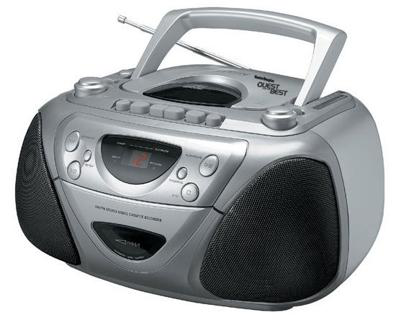

In [20]:
imagenette[4]['image']

In [21]:
imagenette[4]['label']

2

In [23]:
processor(
    text=None,
    images=imagenette[0]['image'],
    return_tensors='pt'
)

{'pixel_values': tensor([[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          ...,
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]],

         [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          ...,
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749]],

         [[2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
          [2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
          [2.1459, 2.1459

In [24]:
image = processor(
    text=None,
    images=imagenette[0]['image'],
    return_tensors='pt'
)['pixel_values'].to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [25]:
img_emb = model.get_image_features(image)
img_emb.shape

torch.Size([1, 512])

In [26]:
img_emb = img_emb.detach().cpu().numpy()

In [ ]:
scores = np.dot(img_emb, label_emb.T)
scores.shape

In [30]:
# get index of highest score
pred = np.argmax(scores)
print(pred)
print(labels[pred])

2
cassette player


In [31]:
from tqdm.auto import tqdm

preds = []
batch_size = 32

for i in tqdm(range(0, len(imagenette), batch_size)):
    i_end = min(i + batch_size, len(imagenette))
    images = processor(
        text=None,
        images=imagenette[i:i_end]['image'],
        return_tensors='pt'
    )['pixel_values'].to(device)
    img_emb = model.get_image_features(images)
    img_emb = img_emb.detach().cpu().numpy()
    scores = np.dot(img_emb, label_emb.T)
    preds.extend(np.argmax(scores, axis=1))

  0%|          | 0/123 [00:00<?, ?it/s]

In [33]:
true_preds = []
for i, label in enumerate(imagenette['label']):
    if label == preds[i]:
        true_preds.append(1)
    else:
        true_preds.append(0)

sum(true_preds) / len(true_preds)

0.9867515923566879

laion/CLIP-ViT-bigG-14-laion2B-39B-b160k

In [37]:
# initialization
from transformers import CLIPProcessor, CLIPModel

model_id = "laion/CLIP-ViT-bigG-14-laion2B-39B-b160k"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

RuntimeError: [enforce fail at C:\cb\pytorch_1000000000000\work\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 252968960 bytes.